In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.base import clone
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Input
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
X_train = train.drop(columns=['label'])
Y_train = train['label']
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
test = test.to_numpy()

In [4]:
print(f'X_train Shape:{X_train.shape}')
print(f'Y_train Shape:{Y_train.shape}')
print(f'test Shape:{test.shape}')

X_train Shape:(42000, 784)
Y_train Shape:(42000,)
test Shape:(28000, 784)


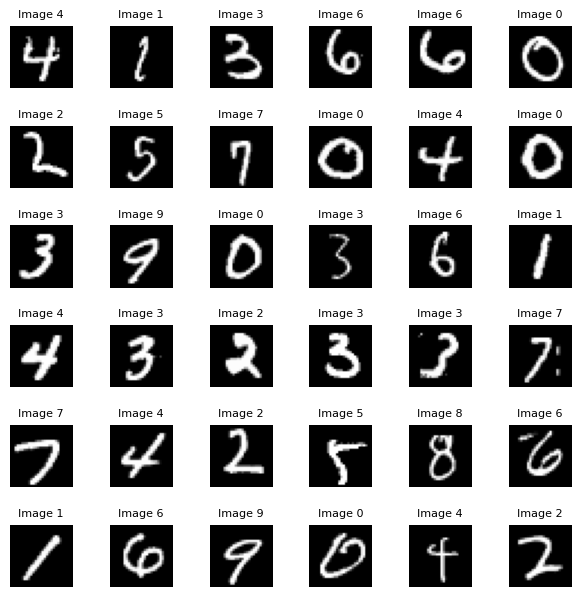

In [5]:
m = len(X_train)
fig,axes = plt.subplots(6,6, figsize=(6,6))
fig.tight_layout(pad=0.1)

for ax in axes.flat:
    random_idx = np.random.randint(m)
    random_img = X_train[random_idx].reshape(28,28)
    ax.imshow(random_img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {Y_train[random_idx]}', fontsize=8)
plt.show()

In [6]:
# Set seed for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    tf.random.set_seed(seed)

set_seed()

In [7]:
def create_model():
    model = Sequential()
    model.add(Input(shape=(784,)))
    model.add(Dense(units=64, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=32, activation='relu', kernel_regularizer=l2(0.02)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(units=10, activation='softmax'))

    optimizer = Adam(learning_rate=0.002)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [8]:
model = create_model()

# Callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reducer = ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.00001)

# Fit the model
history = model.fit(X_train, Y_train, batch_size=128, epochs=50, validation_split=0.25,
                    callbacks=[early_stopping, lr_reducer])

Epoch 1/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7373 - loss: 2.3739 - val_accuracy: 0.9065 - val_loss: 0.6765 - learning_rate: 0.0020
Epoch 2/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8998 - loss: 0.5816 - val_accuracy: 0.9110 - val_loss: 0.5016 - learning_rate: 0.0020
Epoch 3/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9081 - loss: 0.5235 - val_accuracy: 0.9275 - val_loss: 0.4400 - learning_rate: 0.0020
Epoch 4/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9067 - loss: 0.5273 - val_accuracy: 0.9349 - val_loss: 0.4097 - learning_rate: 0.0020
Epoch 5/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9106 - loss: 0.5092 - val_accuracy: 0.8723 - val_loss: 0.7289 - learning_rate: 0.0020
Epoch 6/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9092 - loss: 0.5147 - val_accuracy: 0.9290 - val_loss: 0.4250 - learning_rate: 0.0020
Epoch 7/50
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9050 - loss: 0.5252 - 

In [9]:
prediction = model.predict(test)
predicted_labels = prediction.argmax(axis=1)

result = pd.DataFrame({
    'ImageId': np.arange(1 , len(predicted_labels) + 1),
    'label': predicted_labels
})
result.to_csv('Prediction.csv', index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


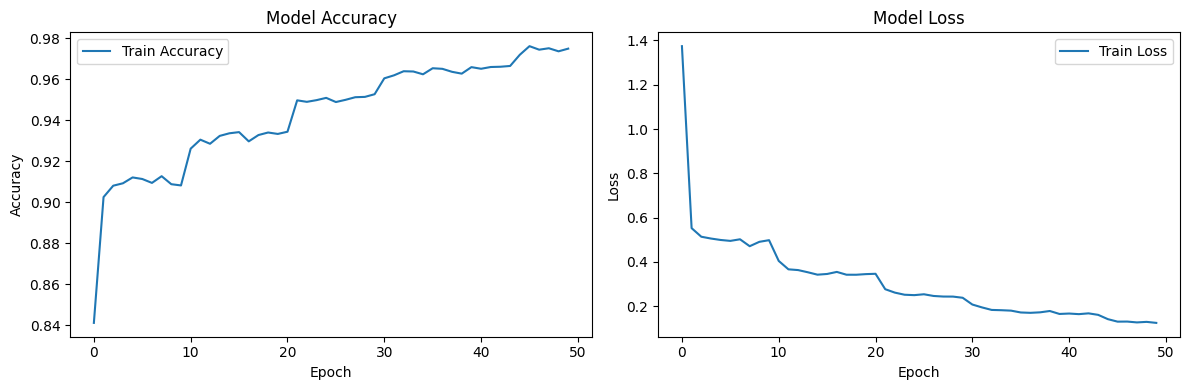

In [10]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()